**Reading and processing data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
    result = []
    for row in data:
        result.append(row[index])
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data

    return X, y

**Linear Regression - Stochastic Gradient Descent**

In [2]:
def initialize_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b = 0
    return w1, w2, w3, b

def compute_predict(x1, x2, x3, w1, w2, w3, b):
    return x1*w1 + x2*w2 + x3*w3 + b

def compute_loss_mse(y_hat, y):
    return (y_hat - y)**2

def compute_loss_mae(y_hat, y):
    return np.abs(y_hat - y)

def compute_gradient_wi(xi, y, y_hat):
    d_wi = 2*xi*(y_hat - y)
    return d_wi

def compute_gradient_b(y, y_hat):
    d_b = 2*(y_hat - y)
    return d_b

def update_weight(theta, d_theta, lr=0.01):
    theta_new = theta - lr*d_theta
    return theta_new

def implement_linear_regression_stochastic(X_data, y_data, loss_function="MSE", epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # compute output
            y_hat = compute_predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            if loss_function == "MSE":
                loss = compute_loss_mse(y_hat, y)
            elif loss_function == "MAE":
                loss = compute_loss_mae(y_hat, y)

            # compute gradient w1, w2, w3, b
            d_w1 = compute_gradient_wi(x1, y, y_hat)
            d_w2 = compute_gradient_wi(x2, y, y_hat)
            d_w3 = compute_gradient_wi(x3, y, y_hat)
            d_b = compute_gradient_b(y, y_hat)

            # update parameters
            w1 = update_weight(w1, d_w1, lr)
            w2 = update_weight(w2, d_w2, lr)
            w3 = update_weight(w3, d_w3, lr)
            b = update_weight(b, d_b, lr)

            # logging
            losses.append(loss)

    return (w1, w2, w3, b, losses)


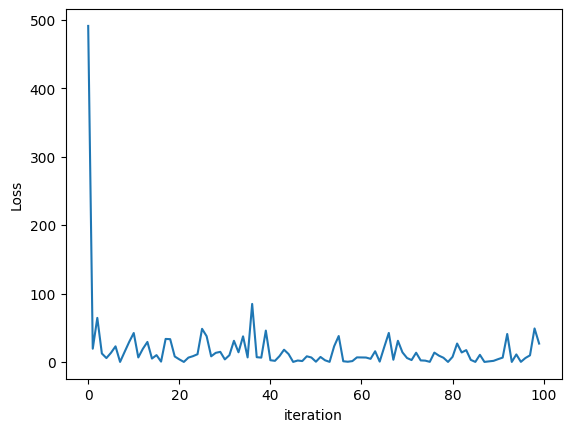

In [3]:
X, y = prepare_data('./advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_stochastic(X, y, loss_function="MSE")
plt.plot(losses[:100])
plt.xlabel("iteration")
plt.ylabel("Loss")
plt.show()

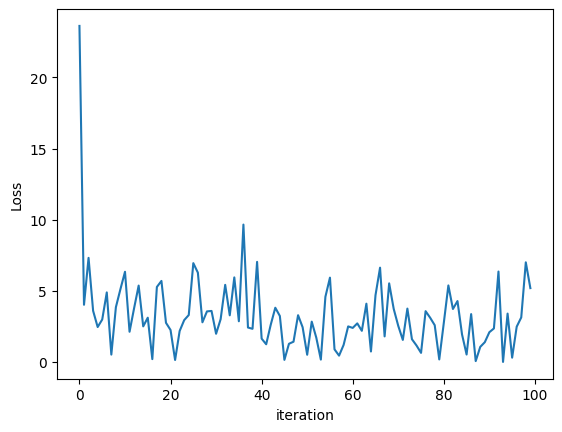

In [4]:
X, y = prepare_data('./advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_stochastic(X, y, loss_function="MAE")
plt.plot(losses[:100])
plt.xlabel("iteration")
plt.ylabel("Loss")
plt.show()

**Prediction for new sample**

In [5]:
tv = 19.2
radio = 35.9
newspaper = 51.3

X, y = prepare_data('./advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_stochastic(X, y, epoch_max=50, lr=1e-5)
sales = compute_predict(tv, radio, newspaper, w1, w2, w3, b)
print(f"Predicted sales is {sales}")

Predicted sales is 8.176442045713753


**Linear Regression - Batch Gradient Descent**

In [6]:
def implement_linear_regression_batch(X_data, y_data, loss_function="MSE", epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):

        loss_total = 0
        dw1_total = 0
        dw2_total = 0
        dw3_total = 0
        db_total = 0

        for i in range(N):
            # get sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # compute predicted output
            y_hat = compute_predict(x1, x2, x3, w1, w2, w3, b)

            # compute accumulate loss
            if loss_function == "MSE":
                loss_total += compute_loss_mse(y_hat, y)
            elif loss_function == "MAE":
                loss_total += compute_loss_mae(y_hat, y)

            # compute accumulate gradient
            dw1_total += compute_gradient_wi(x1, y, y_hat)
            dw2_total += compute_gradient_wi(x2, y, y_hat)
            dw3_total += compute_gradient_wi(x3, y, y_hat)
            db_total += compute_gradient_b(y, y_hat)

        # logging
        losses.append(loss_total/N)
        dw1 = dw1_total/N
        dw2 = dw2_total/N
        dw3 = dw3_total/N
        db = db_total/N

        # update weights
        w1 = update_weight(w1, dw1, lr)
        w2 = update_weight(w2, dw2, lr)
        w3 = update_weight(w3, dw3, lr)
        b = update_weight(b, db, lr)

    return (w1, w2, w3, b, losses)

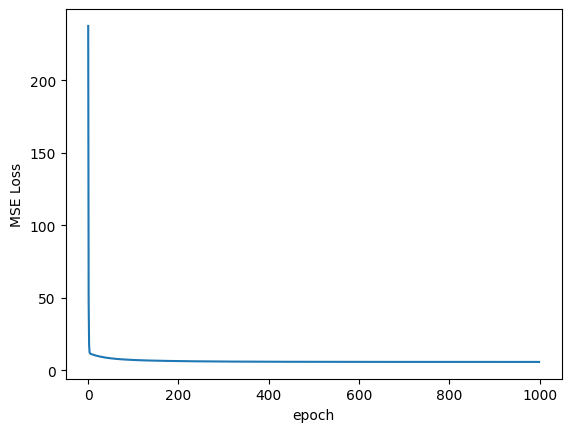

In [7]:
X, y = prepare_data('./advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_batch(X, y, loss_function="MSE", epoch_max=1000, lr=1e-5)
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("MSE Loss")
plt.show()

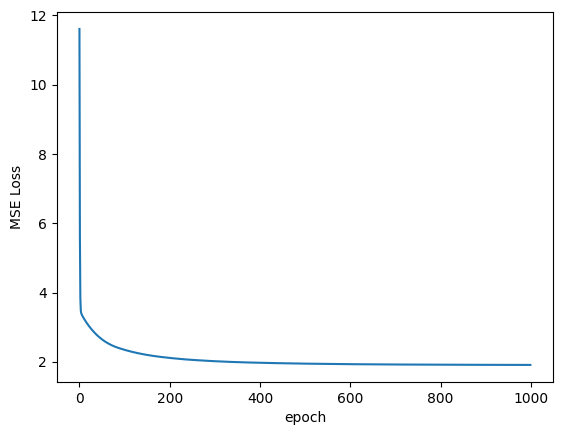

In [8]:
X, y = prepare_data('./advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_batch(X, y, loss_function="MAE", epoch_max=1000, lr=1e-5)
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("MSE Loss")
plt.show()

**Linear Regression - Mini-Batch Gradient Descent**

In [9]:
def implement_linear_regression_minibatch(X_data, y_data, batch_size=10, loss_function="MSE", epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    m = batch_size

    for epoch in range(epoch_max):
        for i in range(0, N, m):
            loss_total = 0
            dw1_total = 0
            dw2_total = 0
            dw3_total = 0
            db_total = 0

            for j in range(m):
                # get sample
                x1 = X_data[0][i+j]
                x2 = X_data[1][i+j]
                x3 = X_data[2][i+j]
                y = y_data[i+j]

                # compute predicted output
                y_hat = compute_predict(x1, x2, x3, w1, w2, w3, b)

                # compute accumulate loss
                if loss_function == "MSE":
                    loss_total += compute_loss_mse(y_hat, y)
                elif loss_function == "MAE":
                    loss_total += compute_loss_mae(y_hat, y)

                # compute accumulate gradient
                dw1_total += compute_gradient_wi(x1, y, y_hat)
                dw2_total += compute_gradient_wi(x2, y, y_hat)
                dw3_total += compute_gradient_wi(x3, y, y_hat)
                db_total += compute_gradient_b(y, y_hat)

            # logging
            losses.append(loss_total/m)
            dw1 = dw1_total/m
            dw2 = dw2_total/m
            dw3 = dw3_total/m
            db = db_total/m

            # update weights
            w1 = update_weight(w1, dw1, lr)
            w2 = update_weight(w2, dw2, lr)
            w3 = update_weight(w3, dw3, lr)
            b = update_weight(b, db, lr)

    return (w1, w2, w3, b, losses)

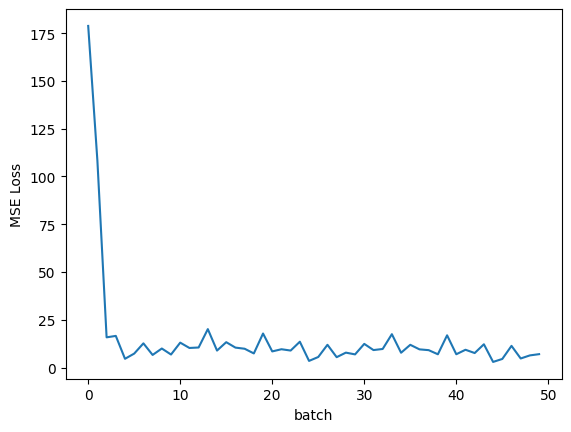

In [10]:
X, y = prepare_data('./advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_minibatch(X, y)
plt.plot(losses[:50])
plt.xlabel("batch")
plt.ylabel("MSE Loss")
plt.show()

**Other ways to prepare data**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
    result = []
    for row in data:
        result.append(row[index])
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data

    return X, y

In [12]:
def initialize_params():
    b = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    return [b, w1, w2, w3]

def compute_predict(X_features, weights):
    return np.dot(X_features.T, weights)

def compute_loss_mse(y_hat, y):
    return (y_hat - y)**2

def compute_loss_mae(y_hat, y):
    return np.abs(y_hat - y)

def compute_gradient_w(X_features, y, y_hat):
    d_weights = 2 * np.dot(X_features, (y_hat - y))
    return d_weights

def update_weight(weights, d_weights, lr=0.01):
    weights_new = weights - lr*d_weights
    return weights_new

def implement_linear_regression(X_features, y_output, loss_function="MSE", epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            feature_i = np.array(X_features[i])
            y = y_output[i]

            # compute output
            y_hat = compute_predict(feature_i, weights)

            # compute loss
            if loss_function == "MSE":
                loss = compute_loss_mse(y_hat, y)
            elif loss_function == "MAE":
                loss = compute_loss_mae(y_hat, y)

            # compute gradient
            d_weights = compute_gradient_w(feature_i, y, y_hat)

            # update parameters
            weights = update_weight(weights, d_weights, lr)

            # logging
            losses.append(loss)

    return weights, losses

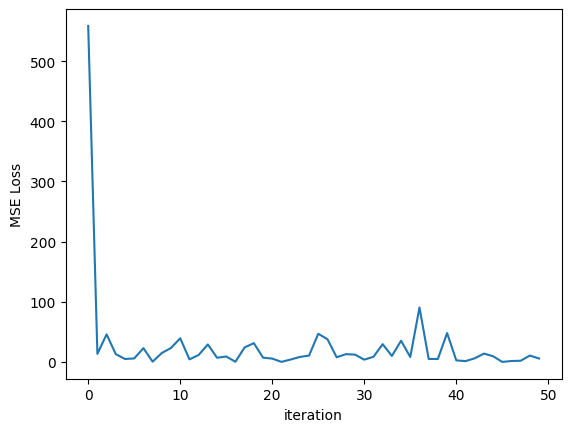

In [13]:
X, y = prepare_data("./advertising.csv")
W, L = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
plt.plot(L[:50])
plt.xlabel("iteration")
plt.ylabel("MSE Loss")
plt.show()